## INSTALACIÓN E IMPORTACIÓN DE LIBRERÍAS

In [1]:
# Evitamos que se generen Warnings en los outputs

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import sklearn

In [3]:
import os
os.environ["PATH"] += os.pathsep + "/opt/homebrew/bin/"
import graphviz



In [4]:
plt.style.use('ggplot')

In [5]:
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

## IMPORTACIÓN DE DATOS

In [6]:
dfDemographic = pd.read_csv('/Users/noecrespo/Documents/Nuclio - Data Science & IA/TFM/easyMoney/datasets_TFM + diccionario/customer_sociodemographics.csv', index_col = 0)
print(dfDemographic)

           pk_cid pk_partition country_id  region_code gender  age deceased  \
0         1375586      2018-01         ES         29.0      H   35        N   
1         1050611      2018-01         ES         13.0      V   23        N   
2         1050612      2018-01         ES         13.0      V   23        N   
3         1050613      2018-01         ES         50.0      H   22        N   
4         1050614      2018-01         ES         50.0      V   23        N   
...           ...          ...        ...          ...    ...  ...      ...   
13647304  1166765      2019-05         ES         50.0      V   22        N   
13647305  1166764      2019-05         ES         26.0      V   23        N   
13647306  1166763      2019-05         ES         50.0      H   47        N   
13647307  1166789      2019-05         ES         50.0      H   22        N   
13647308  1550586      2019-05         ES         28.0      H   37        N   

             salary  
0          87218.10  
1      

In [7]:
dfSales = pd.read_csv('/Users/noecrespo/Documents/Nuclio - Data Science & IA/TFM/easyMoney/datasets_TFM + diccionario/sales.csv', index_col = 0)
print(dfSales)

        pk_sale      cid  month_sale  product_ID  net_margin
0          6666    33620  2018-05-01        2335       952.9
1          6667    35063  2018-06-01        2335      1625.2
2          6668    37299  2018-02-01        2335      1279.7
3          6669    39997  2018-02-01        2335      1511.9
4          6670    44012  2018-02-01        2335      1680.3
...         ...      ...         ...         ...         ...
240768   247434  1553456  2019-05-01        4657        56.7
240769   247435  1553541  2019-05-01        4657        66.5
240770   247436  1553559  2019-05-01        4657        73.0
240771   247437  1553565  2019-05-01        4657        82.3
240772   247438  1553571  2019-05-01        4657        84.4

[240773 rows x 5 columns]


In [8]:
dfproduct_description = pd.read_csv('/Users/noecrespo/Documents/Nuclio - Data Science & IA/TFM/easyMoney/datasets_TFM + diccionario/product_description.csv', index_col = 0)
print(dfproduct_description)

    pk_product_ID        product_desc family_product
0            4657           em_acount        account
1            3819          debit_card   payment_card
2            1364        pension_plan   pension_plan
3            2234             payroll        account
4            2235     payroll_account        account
5            8871         emc_account        account
6            2312         credit_card   payment_card
7            2335  short_term_deposit     investment
8            2336   long_term_deposit     investment
9            2673          securities     investment
10           1119               funds     investment
11           9001               loans           loan
12           4033            mortgage           loan


In [9]:
dfCustomer_product = pd.read_csv('/Users/noecrespo/Documents/Nuclio - Data Science & IA/TFM/easyMoney/datasets_TFM + diccionario/customer_products.csv', index_col = 0)
print(dfCustomer_product)

           pk_cid pk_partition  short_term_deposit  loans  mortgage  funds  \
0         1375586      2018-01                   0      0         0      0   
1         1050611      2018-01                   0      0         0      0   
2         1050612      2018-01                   0      0         0      0   
3         1050613      2018-01                   1      0         0      0   
4         1050614      2018-01                   0      0         0      0   
...           ...          ...                 ...    ...       ...    ...   
13647304  1166765      2019-05                   0      0         0      0   
13647305  1166764      2019-05                   0      0         0      0   
13647306  1166763      2019-05                   0      0         0      0   
13647307  1166789      2019-05                   0      0         0      0   
13647308  1550586      2019-05                   0      0         0      0   

          securities  long_term_deposit  em_account_pp  credit_

In [10]:
dfComercial = pd.read_csv('/Users/noecrespo/Documents/Nuclio - Data Science & IA/TFM/easyMoney/datasets_TFM + diccionario/customer_commercial_activity.csv', index_col = 0)
print(dfComercial)

           pk_cid pk_partition entry_date entry_channel  active_customer  \
0         1375586      2018-01    2018-01           KHL              1.0   
1         1050611      2018-01    2015-08           KHE              0.0   
2         1050612      2018-01    2015-08           KHE              0.0   
3         1050613      2018-01    2015-08           KHD              0.0   
4         1050614      2018-01    2015-08           KHE              1.0   
...           ...          ...        ...           ...              ...   
13647304  1166765      2019-05    2016-08           KHE              0.0   
13647305  1166764      2019-05    2016-08           KHE              0.0   
13647306  1166763      2019-05    2016-08           KHE              1.0   
13647307  1166789      2019-05    2016-08           KHE              0.0   
13647308  1550586      2019-05    2019-05           NaN              1.0   

                     segment  
0          02 - PARTICULARES  
1         03 - UNIVERSITA

## dfDemographic

### DATA UNDERSTANDING Y VISUALIZACIÓN

In [11]:
dfDemographic.head()

,pk_cid,pk_partition,country_id,region_code,gender,age,deceased,salary
0,1375586,2018-01,ES,29.0,H,35,N,87218.10
1,1050611,2018-01,ES,13.0,V,23,N,35548.74
2,1050612,2018-01,ES,13.0,V,23,N,122179.11
3,1050613,2018-01,ES,50.0,H,22,N,119775.54
4,1050614,2018-01,ES,50.0,V,23,N,NaN


In [12]:
dfDemographic.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Index: 5962924 entries, 0 to 13647308
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   pk_cid        int64  
 1   pk_partition  object 
 2   country_id    object 
 3   region_code   float64
 4   gender        object 
 5   age           int64  
 6   deceased      object 
 7   salary        float64
dtypes: float64(2), int64(2), object(4)
memory usage: 409.4+ MB


### CONTEO DE DUPLICADOS

In [13]:
dfDemographic[dfDemographic.duplicated()]

# No hay duplicados

,pk_cid,pk_partition,country_id,region_code,gender,age,deceased,salary


### CONTEO DE NULOS

In [14]:
dfDemographic.select_dtypes(include = ['number']).isnull().sum()

pk_cid               0
region_code       2264
age                  0
salary         1541104
dtype: int64

In [15]:
dfDemographic.select_dtypes(exclude = ['number']).isnull().sum()

pk_partition     0
country_id       0
gender          25
deceased         0
dtype: int64

### DATA PREPARATION

In [16]:
# Generamos una función para obtener las variables numéricas, boolean y categóricas

def obtener_lista_variables(dataset):
    lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]
    for i in dataset:
        if    (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i") and len(dataset[i].unique())!= 2:
               lista_numericas.append(i)
        elif  (dataset[i].dtype.kind=="b" or dataset[i].dtype.kind=="i")  and len(dataset[i].unique())== 2:
              lista_boolean.append(i)
        elif  (dataset[i].dtype.kind=="O"):
              lista_categoricas.append(i)

    return lista_numericas, lista_boolean, lista_categoricas

In [17]:
lnum_Demographic, lbool_Demographic, lcat_Demographic= obtener_lista_variables(dfDemographic)

In [18]:
# Generamos una variable que contenga las variables numéricas que queremos cambiar a categóricas

column_name = ['pk_cid','region_code']

In [19]:
# Realizamos el cambio mediante la siguiente función

def cambio_cat(column_name):
  dfDemographic[column_name] = dfDemographic[column_name].astype(object)

  return dfDemographic[column_name]

In [20]:
cambio_cat(column_name)

,pk_cid,region_code
0,1375586,29.0
1,1050611,13.0
2,1050612,13.0
3,1050613,50.0
4,1050614,50.0
...,...,...
13647304,1166765,50.0
13647305,1166764,26.0
13647306,1166763,50.0
13647307,1166789,50.0


In [21]:
# Cambiamos formato fecha
dfDemographic["pk_partition"] = pd.to_datetime(dfDemographic["pk_partition"], format = "%Y-%m")

In [22]:
# Comprobamos conversión

dfDemographic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5962924 entries, 0 to 13647308
Data columns (total 8 columns):
 #   Column        Dtype         
---  ------        -----         
 0   pk_cid        object        
 1   pk_partition  datetime64[ns]
 2   country_id    object        
 3   region_code   object        
 4   gender        object        
 5   age           int64         
 6   deceased      object        
 7   salary        float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 409.4+ MB


#### Limpieza de atributos: Nulos

In [23]:
# Imputamos nulos como 'No Dato'

dfDemographic['gender'].fillna('No Dato', inplace=True)
dfDemographic['region_code'].fillna('No Dato', inplace=True)

In [24]:
# Imputamos nulos como -1

dfDemographic['salary'].fillna(-1, inplace=True)

In [25]:
dfDemographic.isnull().sum()

pk_cid          0
pk_partition    0
country_id      0
region_code     0
gender          0
age             0
deceased        0
salary          0
dtype: int64

## dfSales

### DATA UNDERSTANDING Y VISUALIZACIÓN

In [26]:
dfSales.head()

,pk_sale,cid,month_sale,product_ID,net_margin
0,6666,33620,2018-05-01,2335,952.9
1,6667,35063,2018-06-01,2335,1625.2
2,6668,37299,2018-02-01,2335,1279.7
3,6669,39997,2018-02-01,2335,1511.9
4,6670,44012,2018-02-01,2335,1680.3


In [27]:
dfSales.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Index: 240773 entries, 0 to 240772
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   pk_sale     240773 non-null  int64  
 1   cid         240773 non-null  int64  
 2   month_sale  240773 non-null  object 
 3   product_ID  240773 non-null  int64  
 4   net_margin  240773 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 11.0+ MB


### CONTEO DE DUPLICADOS

In [28]:
dfSales[dfSales.duplicated()]

# No hay duplicados

,pk_sale,cid,month_sale,product_ID,net_margin


### CONTEO DE NULOS

In [29]:
dfSales.select_dtypes(include = ['number']).isnull().sum()

pk_sale       0
cid           0
product_ID    0
net_margin    0
dtype: int64

In [30]:
dfSales.select_dtypes(exclude = ['number']).isnull().sum()

month_sale    0
dtype: int64

### DATA PREPARATION

In [31]:
lnum_Sales, lbool_Sales, lcat_Sales= obtener_lista_variables(dfSales)

In [32]:
# Cambiamos numéricas a categóricas

column_name = ['pk_sale','cid','product_ID']

In [33]:
def cambio_cat(column_name):
  dfSales[column_name] = dfSales[column_name].astype(object)

  return dfSales[column_name]

In [34]:
cambio_cat(column_name)

,pk_sale,cid,product_ID
0,6666,33620,2335
1,6667,35063,2335
2,6668,37299,2335
3,6669,39997,2335
4,6670,44012,2335
...,...,...,...
240768,247434,1553456,4657
240769,247435,1553541,4657
240770,247436,1553559,4657
240771,247437,1553565,4657


In [35]:
# Cambiamos a fecha
dfSales["month_sale"] = pd.to_datetime(dfSales["month_sale"], format = "%Y-%m-%d")

In [36]:
dfSales['month_sale'].value_counts()

month_sale
2018-10-01    27693
2018-09-01    24488
2018-08-01    21054
2018-07-01    20602
2018-11-01    19155
2018-02-01    15182
2018-12-01    15015
2019-01-01    11872
2018-03-01    11668
2018-06-01    11558
2019-03-01    11506
2019-02-01    11360
2019-05-01    10211
2018-04-01     9962
2019-04-01     9889
2018-05-01     9558
Name: count, dtype: int64

In [37]:
# Comprobamos conversión

dfSales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240773 entries, 0 to 240772
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   pk_sale     240773 non-null  object        
 1   cid         240773 non-null  object        
 2   month_sale  240773 non-null  datetime64[ns]
 3   product_ID  240773 non-null  object        
 4   net_margin  240773 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 11.0+ MB


## dfproduct_description

### DATA UNDERSTANDING Y VISUALIZACIÓN

In [38]:
dfproduct_description.head()

,pk_product_ID,product_desc,family_product
0,4657,em_acount,account
1,3819,debit_card,payment_card
2,1364,pension_plan,pension_plan
3,2234,payroll,account
4,2235,payroll_account,account


In [39]:
dfproduct_description.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 0 to 12
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   pk_product_ID   13 non-null     int64 
 1   product_desc    13 non-null     object
 2   family_product  13 non-null     object
dtypes: int64(1), object(2)
memory usage: 416.0+ bytes


### CONTEO DE DUPLICADOS

In [40]:
dfproduct_description[dfproduct_description.duplicated()]

# No hay duplicados

,pk_product_ID,product_desc,family_product


### CONTEO DE NULOS

In [41]:
dfproduct_description.select_dtypes(include = ['number']).isnull().sum()

pk_product_ID    0
dtype: int64

In [42]:
dfproduct_description.select_dtypes(exclude = ['number']).isnull().sum()

product_desc      0
family_product    0
dtype: int64

### DATA PREPARATION

In [43]:
lnum_product_description, lbool_product_description, lcat_product_description= obtener_lista_variables(dfproduct_description)

In [44]:
# Cambiamos numéricas a categóricas

column_name = ['pk_product_ID']

In [45]:
def cambio_cat(column_name):
  dfproduct_description[column_name] = dfproduct_description[column_name].astype(object)

  return dfproduct_description[column_name]

In [46]:
cambio_cat(column_name)

,pk_product_ID
0,4657
1,3819
2,1364
3,2234
4,2235
5,8871
6,2312
7,2335
8,2336
9,2673


In [47]:
# Comprobamos conversión

dfproduct_description.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 0 to 12
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   pk_product_ID   13 non-null     object
 1   product_desc    13 non-null     object
 2   family_product  13 non-null     object
dtypes: object(3)
memory usage: 416.0+ bytes


## dfCustomer_product

### DATA UNDERSTANDING Y VISUALIZACIÓN

In [48]:
dfCustomer_product.head()

,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount
0,1375586,2018-01,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
1,1050611,2018-01,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
2,1050612,2018-01,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
3,1050613,2018-01,1,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0
4,1050614,2018-01,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1


In [49]:
dfCustomer_product.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Index: 5962924 entries, 0 to 13647308
Data columns (total 17 columns):
 #   Column              Dtype  
---  ------              -----  
 0   pk_cid              int64  
 1   pk_partition        object 
 2   short_term_deposit  int64  
 3   loans               int64  
 4   mortgage            int64  
 5   funds               int64  
 6   securities          int64  
 7   long_term_deposit   int64  
 8   em_account_pp       int64  
 9   credit_card         int64  
 10  payroll             float64
 11  pension_plan        float64
 12  payroll_account     int64  
 13  emc_account         int64  
 14  debit_card          int64  
 15  em_account_p        int64  
 16  em_acount           int64  
dtypes: float64(2), int64(14), object(1)
memory usage: 818.9+ MB


### CONTEO DE DUPLICADOS

In [50]:
dfCustomer_product[dfCustomer_product.duplicated()]

# No hay duplicados

,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount


### CONTEO DE NULOS

In [51]:
dfCustomer_product.select_dtypes(include = ['number']).isnull().sum()

pk_cid                 0
short_term_deposit     0
loans                  0
mortgage               0
funds                  0
securities             0
long_term_deposit      0
em_account_pp          0
credit_card            0
payroll               61
pension_plan          61
payroll_account        0
emc_account            0
debit_card             0
em_account_p           0
em_acount              0
dtype: int64

In [52]:
dfCustomer_product.select_dtypes(exclude = ['number']).isnull().sum()

pk_partition    0
dtype: int64

### DATA PREPARATION

In [53]:
lnum_Customer_product, lbool_Customer_product, lcat_Customer_product= obtener_lista_variables(dfCustomer_product)

In [54]:
dfCustomer_product['payroll'].value_counts()

payroll
0.0    5757076
1.0     205787
Name: count, dtype: int64

In [55]:
dfCustomer_product['pension_plan'].value_counts()

pension_plan
0.0    5745061
1.0     217802
Name: count, dtype: int64

In [56]:
# Cambiamos numéricas a categóricas

column_name = ['pk_cid']

In [57]:
def cambio_cat(column_name):
  dfCustomer_product[column_name] = dfCustomer_product[column_name].astype(object)

  return dfCustomer_product[column_name]

In [58]:
cambio_cat(column_name)

,pk_cid
0,1375586
1,1050611
2,1050612
3,1050613
4,1050614
...,...
13647304,1166765
13647305,1166764
13647306,1166763
13647307,1166789


In [59]:
# Cambiamos a fecha
dfCustomer_product["pk_partition"] = pd.to_datetime(dfCustomer_product["pk_partition"], format = "%Y-%m")

In [60]:
# Comprobamos conversión

dfCustomer_product.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5962924 entries, 0 to 13647308
Data columns (total 17 columns):
 #   Column              Dtype         
---  ------              -----         
 0   pk_cid              object        
 1   pk_partition        datetime64[ns]
 2   short_term_deposit  int64         
 3   loans               int64         
 4   mortgage            int64         
 5   funds               int64         
 6   securities          int64         
 7   long_term_deposit   int64         
 8   em_account_pp       int64         
 9   credit_card         int64         
 10  payroll             float64       
 11  pension_plan        float64       
 12  payroll_account     int64         
 13  emc_account         int64         
 14  debit_card          int64         
 15  em_account_p        int64         
 16  em_acount           int64         
dtypes: datetime64[ns](1), float64(2), int64(13), object(1)
memory usage: 818.9+ MB


In [61]:
dfCustomer_product.head()

,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount
0,1375586,2018-01-01,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
1,1050611,2018-01-01,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
2,1050612,2018-01-01,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
3,1050613,2018-01-01,1,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0
4,1050614,2018-01-01,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1


#### Limpieza de atributos: Nulos

In [62]:
# Eliminamos las filas con valores nulos ya que son una cantidad muy reducida (61).
dfCustomer_product = dfCustomer_product.dropna(subset=['payroll'])
dfCustomer_product = dfCustomer_product.dropna(subset=['pension_plan'])

In [63]:
dfCustomer_product.isnull().sum()

pk_cid                0
pk_partition          0
short_term_deposit    0
loans                 0
mortgage              0
funds                 0
securities            0
long_term_deposit     0
em_account_pp         0
credit_card           0
payroll               0
pension_plan          0
payroll_account       0
emc_account           0
debit_card            0
em_account_p          0
em_acount             0
dtype: int64

## dfComercial

### DATA UNDERSTANDING Y VISUALIZACIÓN

In [64]:
dfComercial.head()

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment
0,1375586,2018-01,2018-01,KHL,1.0,02 - PARTICULARES
1,1050611,2018-01,2015-08,KHE,0.0,03 - UNIVERSITARIO
2,1050612,2018-01,2015-08,KHE,0.0,03 - UNIVERSITARIO
3,1050613,2018-01,2015-08,KHD,0.0,03 - UNIVERSITARIO
4,1050614,2018-01,2015-08,KHE,1.0,03 - UNIVERSITARIO


In [65]:
dfComercial.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Index: 5962924 entries, 0 to 13647308
Data columns (total 6 columns):
 #   Column           Dtype  
---  ------           -----  
 0   pk_cid           int64  
 1   pk_partition     object 
 2   entry_date       object 
 3   entry_channel    object 
 4   active_customer  float64
 5   segment          object 
dtypes: float64(1), int64(1), object(4)
memory usage: 318.5+ MB


### CONTEO DE DUPLICADOS

In [66]:
dfComercial[dfComercial.duplicated()]

# No hay duplicados

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment


### CONTEO DE NULOS

In [67]:
dfComercial.select_dtypes(include = ['number']).isnull().sum()

pk_cid             0
active_customer    0
dtype: int64

In [68]:
dfComercial.select_dtypes(exclude = ['number']).isnull().sum()

pk_partition          0
entry_date            0
entry_channel    133033
segment          133944
dtype: int64

### DATA PREPARATION

In [69]:
lnum_Comercial, lbool_Comercial, lcat_Comercial= obtener_lista_variables(dfComercial)

In [70]:
# Cambiamos numéricas a categóricas

column_name = ['pk_cid']

In [71]:
def cambio_cat(column_name):
  dfComercial[column_name] = dfComercial[column_name].astype(object)

  return dfComercial[column_name]

In [72]:
cambio_cat(column_name)

,pk_cid
0,1375586
1,1050611
2,1050612
3,1050613
4,1050614
...,...
13647304,1166765
13647305,1166764
13647306,1166763
13647307,1166789


In [73]:
# Cambiamos a fecha
dfComercial["pk_partition"] = pd.to_datetime(dfComercial["pk_partition"], format = "%Y-%m")
dfComercial["entry_date"] = pd.to_datetime(dfComercial["entry_date"], format = "%Y-%m")

In [74]:
# Comprobamos conversión

dfComercial.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5962924 entries, 0 to 13647308
Data columns (total 6 columns):
 #   Column           Dtype         
---  ------           -----         
 0   pk_cid           object        
 1   pk_partition     datetime64[ns]
 2   entry_date       datetime64[ns]
 3   entry_channel    object        
 4   active_customer  float64       
 5   segment          object        
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 318.5+ MB


In [75]:
# Modificamos columna 'segment' para dejar solo las string ya que no nos aporta nada la parte numérica (01, 02, 03..), nos interesa saber el segmento únicamente.
dfComercial['segment'] = dfComercial['segment'].str.extract(r'-\s*(.*)')
dfComercial.head()


,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment
0,1375586,2018-01-01,2018-01-01,KHL,1.0,PARTICULARES
1,1050611,2018-01-01,2015-08-01,KHE,0.0,UNIVERSITARIO
2,1050612,2018-01-01,2015-08-01,KHE,0.0,UNIVERSITARIO
3,1050613,2018-01-01,2015-08-01,KHD,0.0,UNIVERSITARIO
4,1050614,2018-01-01,2015-08-01,KHE,1.0,UNIVERSITARIO


#### Limpieza de atributos: Nulos

In [76]:
# Imputamos nulos como 'No Dato'

dfComercial['entry_channel'].fillna('No Dato', inplace=True)
dfComercial['segment'].fillna('No Dato', inplace=True)

In [77]:
dfComercial.isnull().sum()

pk_cid             0
pk_partition       0
entry_date         0
entry_channel      0
active_customer    0
segment            0
dtype: int64

# Guardamos dataframes actualizados en formato csv

In [78]:
dfDemographic.to_csv('dfDemographic.csv', index=False)
dfSales.to_csv('dfSales.csv', index=False)
dfproduct_description.to_csv('dfproduct_description.csv', index=False)
dfCustomer_product.to_csv('dfCustomer_product.csv', index=False)
dfComercial.to_csv('dfComercial.csv', index=False)


## Unimos los datasets

In [79]:
# Nos quedamos con los datos de cada partición de pksale para cada fecha de venta
# Integramos los datos basándonos en el identificador común del cliente (cid o pk_cid)
# Comenzamos integrando las ventas con la información del dataset dfCustomer_product
df = pd.merge(dfSales, dfCustomer_product, left_on=['cid', 'month_sale'], right_on=['pk_cid', 'pk_partition'], how='left')


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240773 entries, 0 to 240772
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   pk_sale             240773 non-null  object        
 1   cid                 240773 non-null  object        
 2   month_sale          240773 non-null  datetime64[ns]
 3   product_ID          240773 non-null  object        
 4   net_margin          240773 non-null  float64       
 5   pk_cid              240771 non-null  object        
 6   pk_partition        240771 non-null  datetime64[ns]
 7   short_term_deposit  240771 non-null  float64       
 8   loans               240771 non-null  float64       
 9   mortgage            240771 non-null  float64       
 10  funds               240771 non-null  float64       
 11  securities          240771 non-null  float64       
 12  long_term_deposit   240771 non-null  float64       
 13  em_account_pp       240771 no

In [81]:
df.head()

,pk_sale,cid,month_sale,product_ID,net_margin,pk_cid,pk_partition,short_term_deposit,loans,mortgage,...,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount
0,6666,33620,2018-05-01,2335,952.9,33620,2018-05-01,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,6667,35063,2018-06-01,2335,1625.2,35063,2018-06-01,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,6668,37299,2018-02-01,2335,1279.7,37299,2018-02-01,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,6669,39997,2018-02-01,2335,1511.9,39997,2018-02-01,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6670,44012,2018-02-01,2335,1680.3,44012,2018-02-01,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [82]:
df.isnull().sum()

pk_sale               0
cid                   0
month_sale            0
product_ID            0
net_margin            0
pk_cid                2
pk_partition          2
short_term_deposit    2
loans                 2
mortgage              2
funds                 2
securities            2
long_term_deposit     2
em_account_pp         2
credit_card           2
payroll               2
pension_plan          2
payroll_account       2
emc_account           2
debit_card            2
em_account_p          2
em_acount             2
dtype: int64

## Borrado de columnas

In [83]:
# Lista de columnas a eliminar:
# cid, pk_partition y pk_product_ID son redundantes. 
# em_account_pp solo tiene valores 0
# em_account_p solo tiene 5 valores 1, todos los demás valores son 0 por tanto las eliminamos
columns_to_drop = ['cid', 'pk_partition', 'em_account_pp', 'em_account_p' ]

# Eliminar las columnas
df = df.drop(columns=columns_to_drop)

# Verificar el resultado
print(df.head())


  pk_sale month_sale product_ID  net_margin pk_cid  short_term_deposit  loans  \
0    6666 2018-05-01       2335       952.9  33620                 1.0    0.0   
1    6667 2018-06-01       2335      1625.2  35063                 1.0    0.0   
2    6668 2018-02-01       2335      1279.7  37299                 1.0    0.0   
3    6669 2018-02-01       2335      1511.9  39997                 1.0    0.0   
4    6670 2018-02-01       2335      1680.3  44012                 1.0    0.0   

   mortgage  funds  securities  long_term_deposit  credit_card  payroll  \
0       0.0    0.0         0.0                0.0          0.0      0.0   
1       0.0    0.0         0.0                0.0          0.0      0.0   
2       0.0    0.0         0.0                0.0          0.0      0.0   
3       0.0    0.0         0.0                0.0          0.0      0.0   
4       0.0    0.0         0.0                0.0          0.0      0.0   

   pension_plan  payroll_account  emc_account  debit_card  em_

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240773 entries, 0 to 240772
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   pk_sale             240773 non-null  object        
 1   month_sale          240773 non-null  datetime64[ns]
 2   product_ID          240773 non-null  object        
 3   net_margin          240773 non-null  float64       
 4   pk_cid              240771 non-null  object        
 5   short_term_deposit  240771 non-null  float64       
 6   loans               240771 non-null  float64       
 7   mortgage            240771 non-null  float64       
 8   funds               240771 non-null  float64       
 9   securities          240771 non-null  float64       
 10  long_term_deposit   240771 non-null  float64       
 11  credit_card         240771 non-null  float64       
 12  payroll             240771 non-null  float64       
 13  pension_plan        240771 no

## EDA

In [85]:
df.describe()


,month_sale,net_margin,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_acount
count,240773,240773.000000,240771.000000,240771.000000,240771.000000,240771.000000,240771.000000,240771.000000,240771.000000,240771.000000,240771.00000,240771.000000,240771.000000,240771.000000,240771.000000
mean,2018-09-09 21:39:56.944840448,606.878164,0.026552,0.000166,0.000154,0.007879,0.009565,0.036612,0.036778,0.253311,0.26109,0.237961,0.107953,0.294649,0.727467
min,2018-02-01 00:00:00,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,2018-07-01 00:00:00,61.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,2018-09-01 00:00:00,69.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000
75%,2018-12-01 00:00:00,79.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,0.000000,0.000000,1.000000,1.000000
max,2019-05-01 00:00:00,18466.400000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000
std,NaN,1735.806089,0.160771,0.012888,0.012396,0.088413,0.097333,0.187807,0.188216,0.434909,0.43923,0.425836,0.310322,0.455886,0.445263


In [86]:
df.isnull().sum()


pk_sale               0
month_sale            0
product_ID            0
net_margin            0
pk_cid                2
short_term_deposit    2
loans                 2
mortgage              2
funds                 2
securities            2
long_term_deposit     2
credit_card           2
payroll               2
pension_plan          2
payroll_account       2
emc_account           2
debit_card            2
em_acount             2
dtype: int64

In [87]:
# Eliminamos las filas con valores nulos
df = df.dropna()

# Verificamos el nuevo tamaño del DataFrame después de eliminar las filas con valores nulos
df.shape


(240771, 18)

In [88]:
df.isnull().sum()


pk_sale               0
month_sale            0
product_ID            0
net_margin            0
pk_cid                0
short_term_deposit    0
loans                 0
mortgage              0
funds                 0
securities            0
long_term_deposit     0
credit_card           0
payroll               0
pension_plan          0
payroll_account       0
emc_account           0
debit_card            0
em_acount             0
dtype: int64

In [89]:
# Generamos una función para separar variables numéricas, categóricas y tipo fecha

def obtener_lista_variables(dataset):
    lista_numericas = []
    lista_categoricas = []
    lista_fechas = []

    for i in dataset:
        if dataset[i].dtype in ['float64', 'int64']:
            lista_numericas.append(i)
        elif dataset[i].dtype == 'object':
            lista_categoricas.append(i)
        elif dataset[i].dtype == 'datetime64[ns]':
            lista_fechas.append(i)

    return lista_numericas, lista_categoricas, lista_fechas

lnum_df, lcat_df, ldate_df = obtener_lista_variables(df)


In [90]:
lnum_df, lcat_df, ldate_df= obtener_lista_variables(df)

In [91]:
lnum_df

['net_margin',
 'short_term_deposit',
 'loans',
 'mortgage',
 'funds',
 'securities',
 'long_term_deposit',
 'credit_card',
 'payroll',
 'pension_plan',
 'payroll_account',
 'emc_account',
 'debit_card',
 'em_acount']

In [92]:
lcat_df

['pk_sale', 'product_ID', 'pk_cid']

In [93]:
ldate_df

['month_sale']

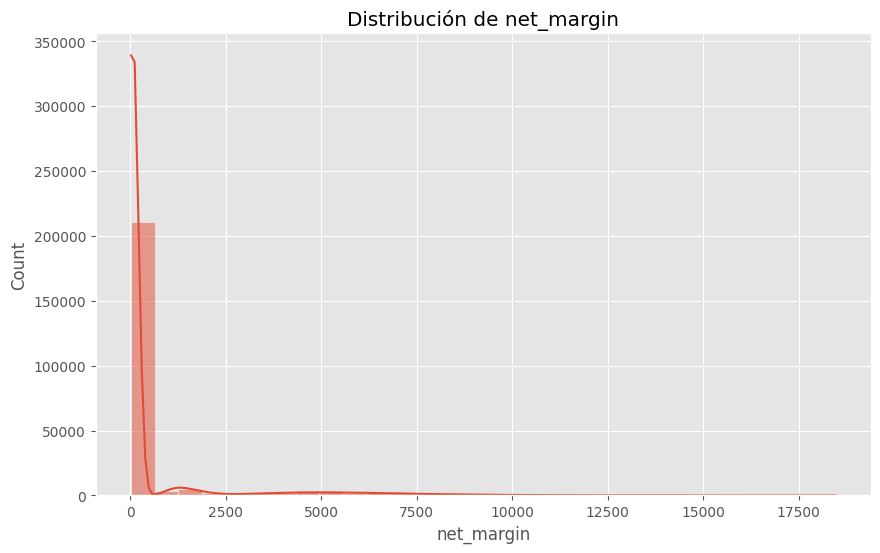

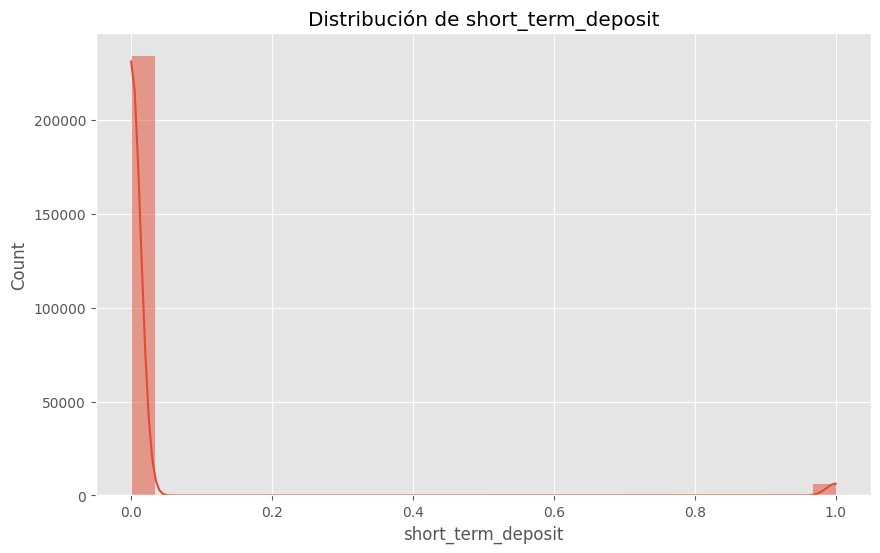

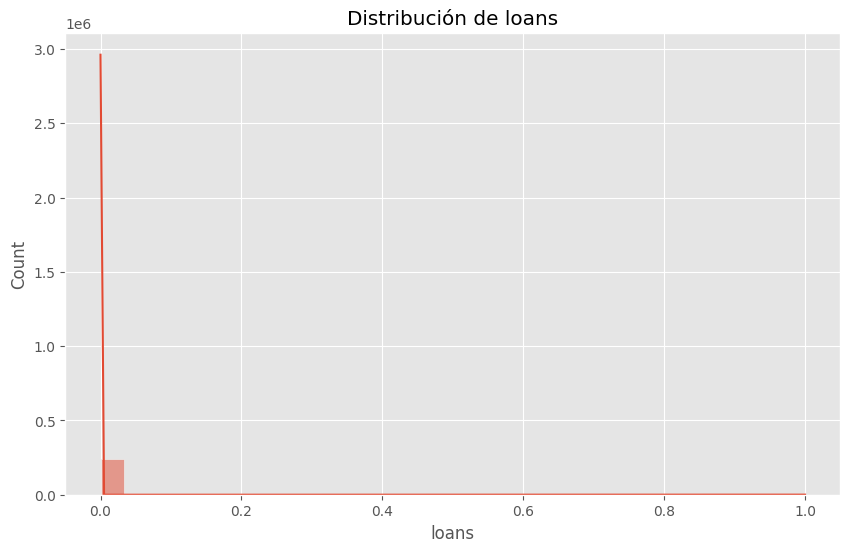

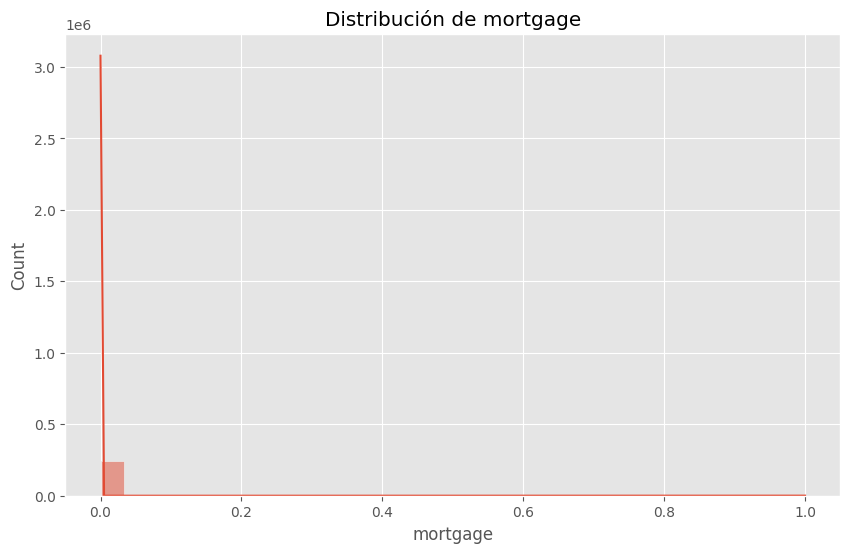

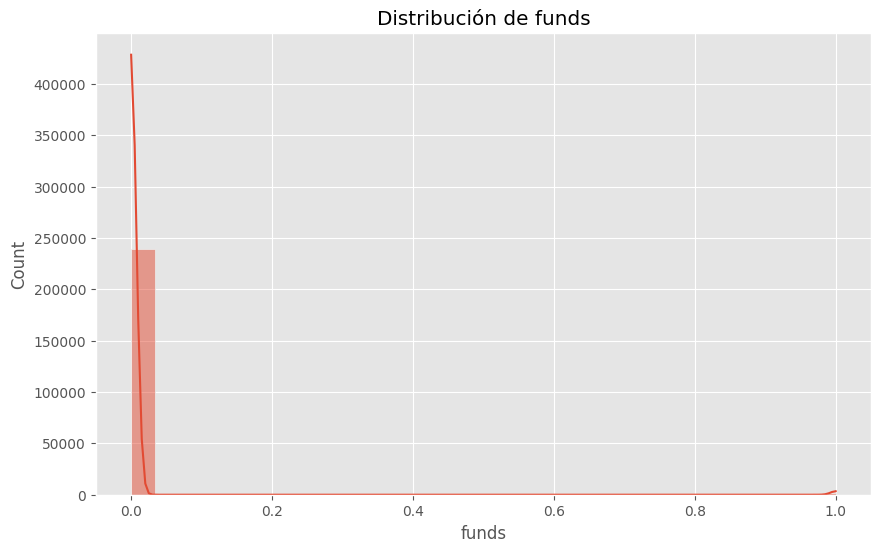

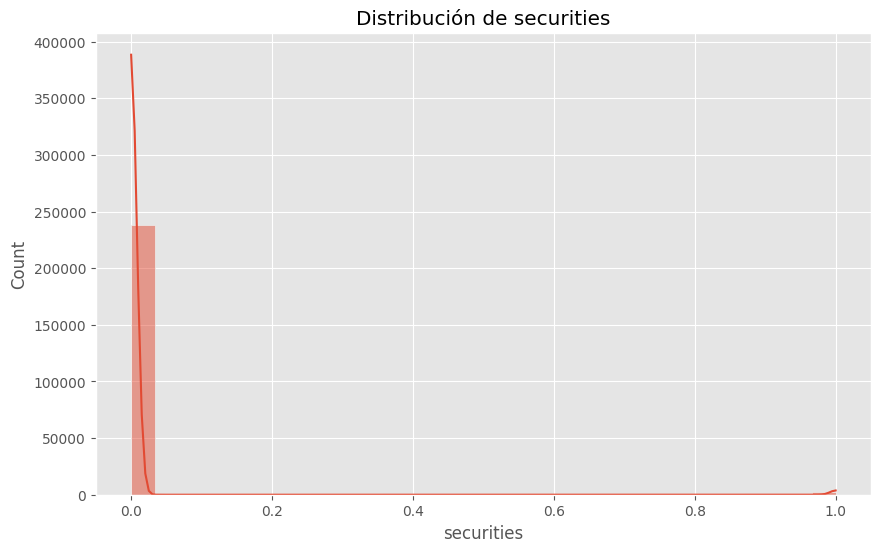

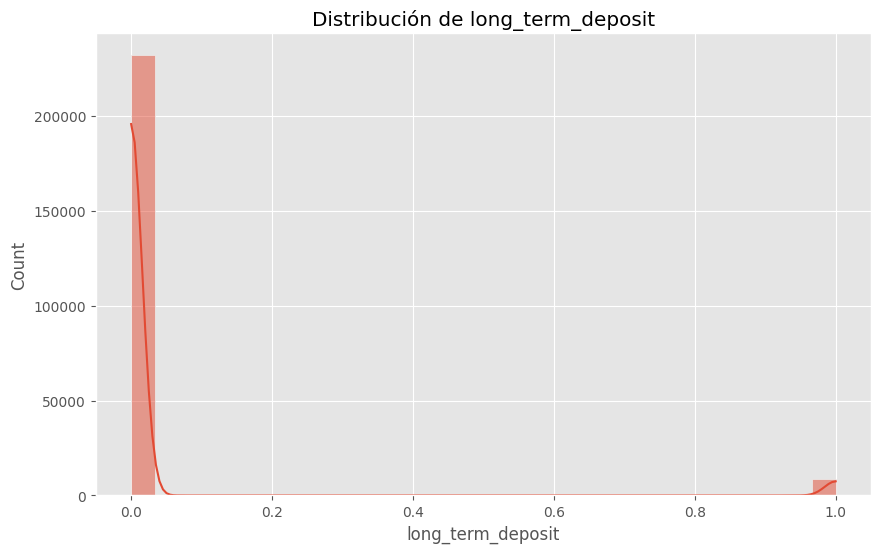

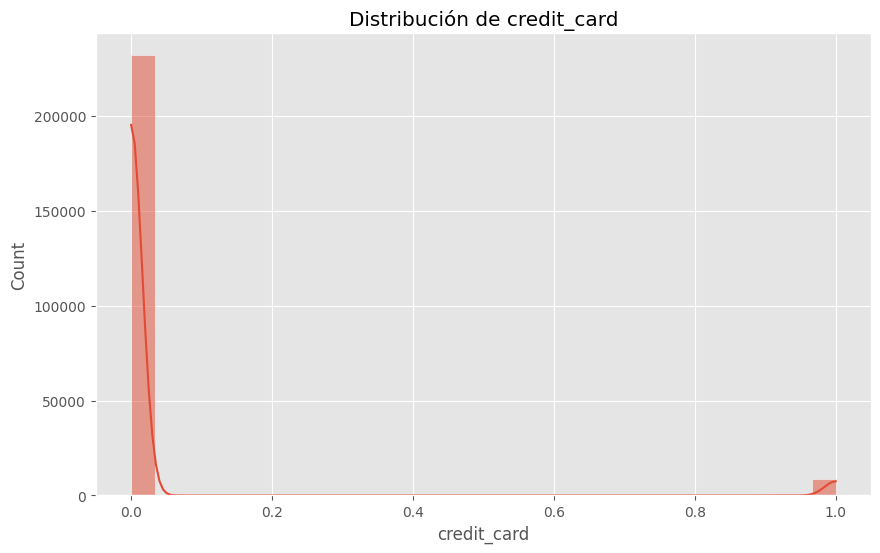

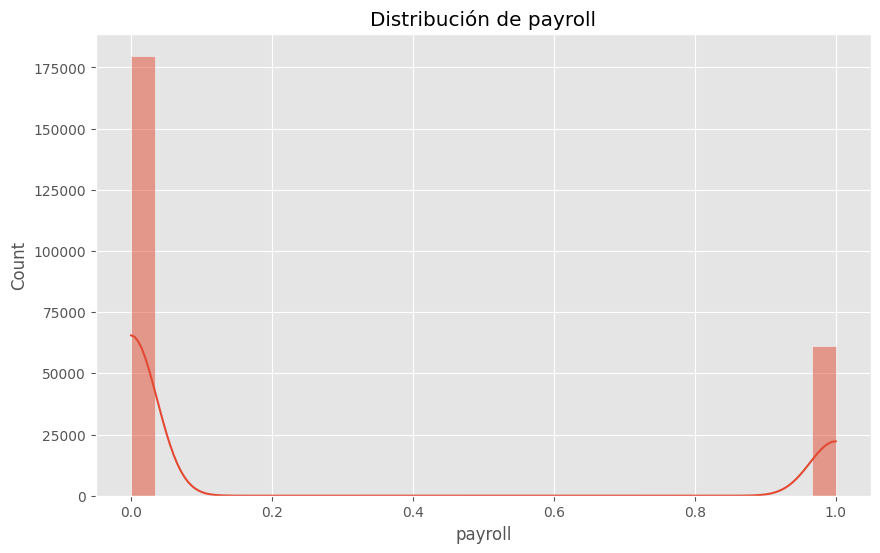

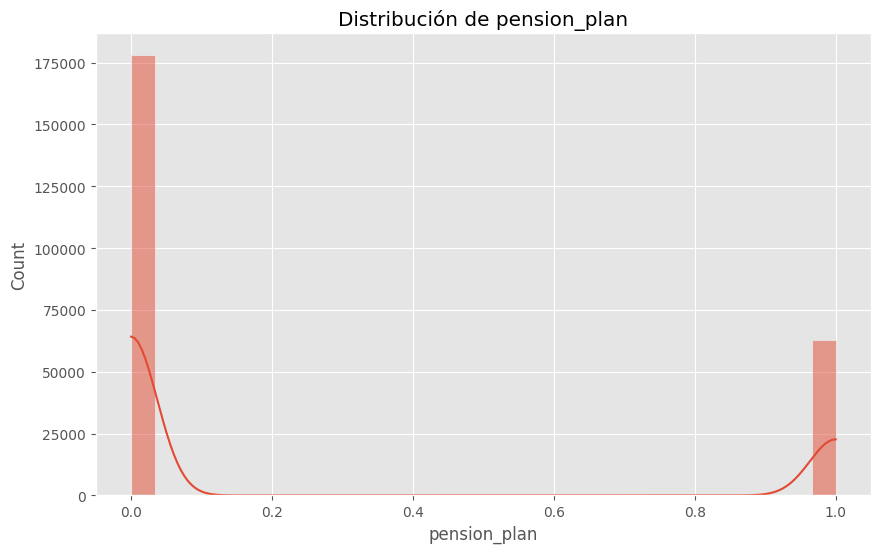

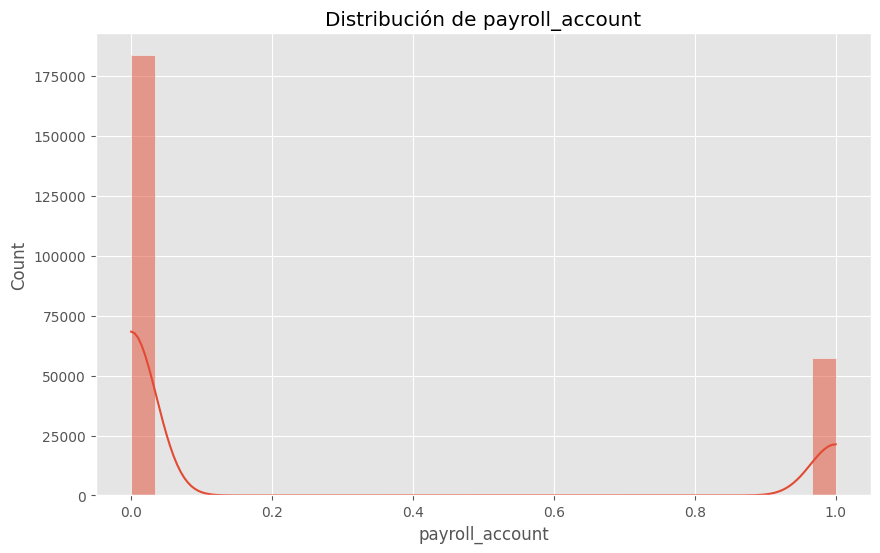

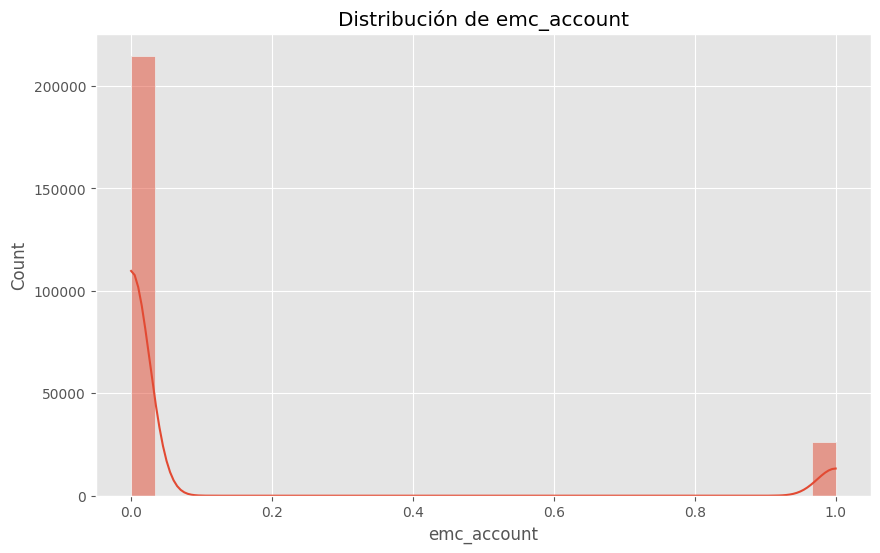

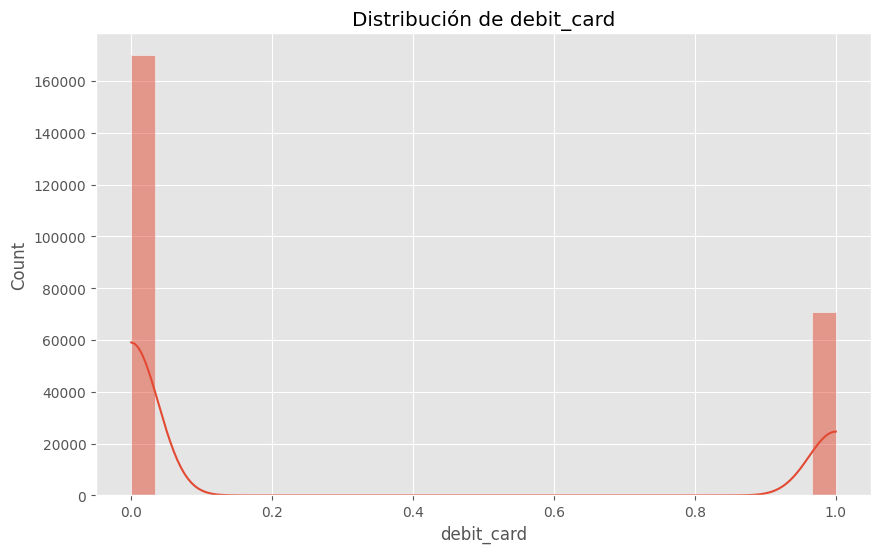

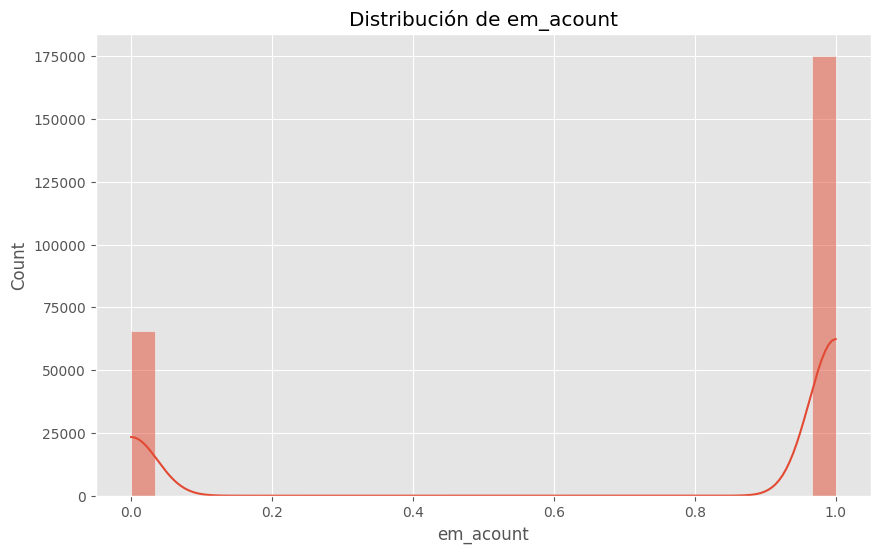

In [94]:
# Realizamos histogramas de variables numéricas

for col in lnum_df:
    plt.figure(figsize=(10,6))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribución de {col}')
    plt.show()


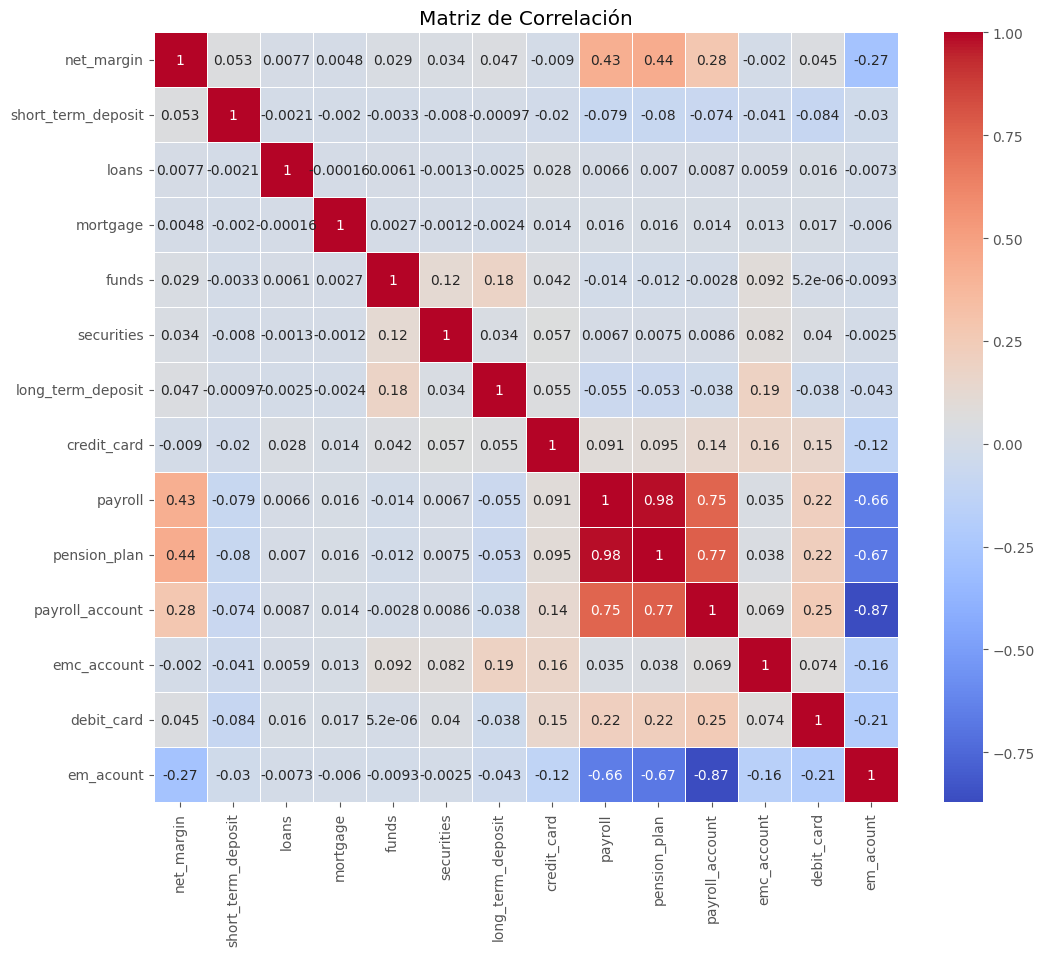

In [95]:
# Generamos un mapa de calor para ver correlaciones

correlation_matrix = df[lnum_df].corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

# Vemos alta correlación entre planes de pensiones y payroll

In [96]:
# Como podemos ver hay alta correlación entre las variables pension_plan, payroll y payroll_account

In [97]:
# Calculamos los productos más vendidos

productos = ['short_term_deposit', 'loans', 'mortgage', 'funds', 'securities', 'long_term_deposit', 
            'credit_card', 'payroll', 'pension_plan', 'payroll_account', 'emc_account', 
            'debit_card', 'em_acount']

ventas_productos = df[productos].sum().sort_values(ascending=False)

In [98]:
ventas_productos

em_acount             175153.0
debit_card             70943.0
pension_plan           62863.0
payroll                60990.0
payroll_account        57294.0
emc_account            25992.0
credit_card             8855.0
long_term_deposit       8815.0
short_term_deposit      6393.0
securities              2303.0
funds                   1897.0
loans                     40.0
mortgage                  37.0
dtype: float64

In [99]:
# Como podemos ver los productos más vendidos son: em_account, debit_card, pension_plan y payroll.